In [22]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#reading the csv file using pandas library and stores it in a variable called "data"
data = pd.read_csv(r"C:\Users\Administrator\Downloads\Titanic-Dataset.csv")

In [24]:
data.head() #displays first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
data.tail() #displays last 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [26]:
#Checking dataset structure
print(data.shape) #rows, columns
print(data.info()) #data types + missing values
print(data.columns) #column names

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [27]:
#Check missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [28]:
#Fill missing ages with median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [29]:
#Fill missing Embarked with the most common value (mode)
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [30]:
#Drop Cabin column (too many missing values)
if "Cabin" in data.columns:
    data = data.drop("Cabin", axis=1)

In [31]:
#Remove duplicates
data = data.drop_duplicates()

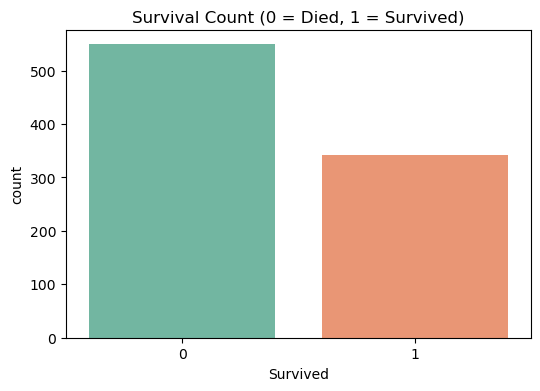

In [32]:
#Survival Count Plot
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=data, hue="Survived", palette="Set2", legend=False)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.savefig("survival_count.png")
plt.show()

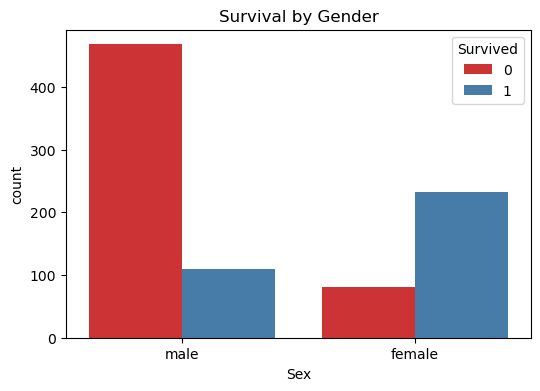

In [33]:
#Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=data, palette="Set1")
plt.title("Survival by Gender")
plt.savefig("survival_by_gender.png")
plt.show()


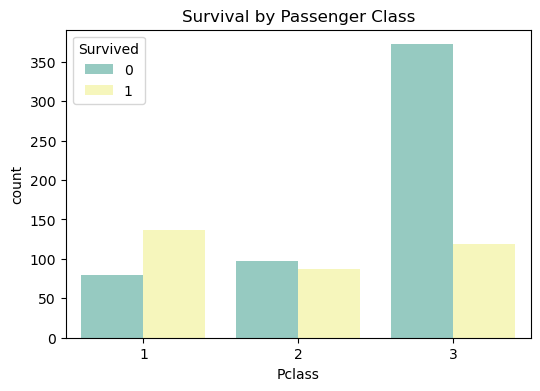

In [34]:
#Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=data, palette="Set3")
plt.title("Survival by Passenger Class")
plt.savefig("survival_by_class.png")
plt.show()


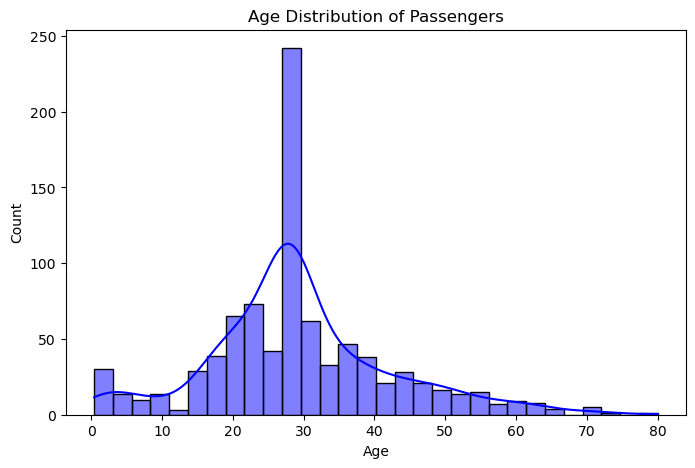

In [35]:
#Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(data["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Passengers")
plt.savefig("age_distribution.png")
plt.show()

In [14]:
print("\n✅ Cleaning complete!")
print("Missing values after cleaning:")
print(data.isnull().sum())
print("\nCleaned dataset saved as 'titanic_cleaned.csv'")


✅ Cleaning complete!
Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Cleaned dataset saved as 'titanic_cleaned.csv'
